In [2]:
! rm -rf space-model
! git clone https://github.com/StepanTita/space-model.git

Cloning into 'space-model'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 155 (delta 47), reused 128 (delta 23), pack-reused 0
Receiving objects: 100% (155/155), 29.68 MiB | 26.11 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [1]:
import multiprocessing

from train import run

In [2]:
MODEL_NAME = 'bert-base-cased'
DATASET_NAME = 'fake-news-net'

SEED = 42
NUM_EPOCHS = 5
BATCH_SIZE = 256
MAX_SEQ_LEN = 512
LEARNING_RATE = 2e-5
MAX_GRAD_NORM = 1000

In [3]:
def train_wrapper(device_id, train_base, train_space, experiment_name, n_latent, config):
    def train():
        run({
            'experiment_name': experiment_name,

            'device_id': device_id,
            'train_base': train_base,
            'train_space': train_space,

            'seed': SEED,
            'dataset_name': DATASET_NAME,
            'model_name': MODEL_NAME,

            'num_labels': 2,
            'num_epochs': NUM_EPOCHS,
            'iterations': 2,

            'max_seq_len': MAX_SEQ_LEN,
            'batch_size': BATCH_SIZE,
            'lr': LEARNING_RATE,
            'fp16': False,
            'max_grad_norm': MAX_GRAD_NORM,
            'weight_decay': 0.01,
            'num_warmup_steps': 0,
            'gradient_accumulation_steps': 1,

            'n_latent': n_latent,
            'l1': config['l1'],
            'l2': config['l2'],
            'cross_entropy_weight': config['ce_w'],
        })

    return train

In [4]:
multiprocessing.Process(target=train_wrapper(device_id=0, train_base=False, train_space=True, experiment_name='inter-loss', n_latent=3, config={
    'l1': 1.0,
    'l2': 0.0,
    'ce_w': 0.0,
})).start()

In [5]:
multiprocessing.Process(target=train_wrapper(device_id=1, train_base=False, train_space=True, experiment_name='inter-intra-loss', n_latent=3, config={
    'l1': 1.0,
    'l2': 1e-5,
    'ce_w': 0.0,
})).start()

In [4]:
multiprocessing.Process(target=train_wrapper(device_id=2, train_base=False, train_space=True, experiment_name='inter-loss', n_latent=64, config={
    'l1': 1.0,
    'l2': 0.0,
    'ce_w': 0.0,
})).start()

2024-01-31 15:57:53,854 - space-fake.terminal - INFO - Config: {'experiment_name': 'inter-loss', 'device_id': 3, 'train_base': False, 'train_space': True, 'seed': 42, 'dataset_name': 'fake-news-net', 'model_name': 'bert-base-cased', 'num_labels': 2, 'num_epochs': 5, 'iterations': 2, 'max_seq_len': 512, 'batch_size': 256, 'lr': 2e-05, 'fp16': False, 'max_grad_norm': 1000, 'weight_decay': 0.01, 'num_warmup_steps': 0, 'gradient_accumulation_steps': 1, 'n_latent': 128, 'l1': 1.0, 'l2': 0.0, 'cross_entropy_weight': 0.0}


Map:   0%|          | 0/18556 [00:00<?, ? examples/s]

Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

2024-01-31 15:58:05,250 - space-fake.terminal - INFO - Number of space model parameters: 197122
2024-01-31 15:58:06,324 - space-fake.terminal - INFO - ****************************** Iteration: 1 ******************************
100%|██████████| 15/15 [01:05<00:00,  4.36s/it]
2024-01-31 16:30:30,252 - space-fake.terminal - INFO - Val loss: 1.9751168648401896
2024-01-31 16:30:30,253 - space-fake.terminal - INFO - Val acc: 0.7349137931034483
2024-01-31 16:30:30,253 - space-fake.terminal - INFO - CS Val acc: 0.763739224137931
2024-01-31 16:30:30,254 - space-fake.terminal - INFO - Val f1: 0.43427499818787496
2024-01-31 16:30:30,255 - space-fake.terminal - INFO - CS Val f1: 0.6566593349339749
2024-01-31 16:30:30,255 - space-fake.terminal - INFO - Val precision: 0.4329830383480826
2024-01-31 16:30:30,255 - space-fake.terminal - INFO - Val recall: 0.4908762187134778
2024-01-31 16:30:30,256 - space-fake.terminal - INFO - ****************************** Iteration: 2 ******************************
1

Initial GPU Usage
GPU memory occupied: 17460 MB.
GPU Usage after emptying the cache
GPU memory occupied: 2068 MB.


2024-01-31 17:02:55,026 - space-fake.terminal - DEBUG - Evaluating space model on test set:
100%|██████████| 15/15 [01:05<00:00,  4.36s/it]
2024-01-31 17:04:00,529 - space-fake.terminal - INFO - Val loss: 1.949261156717936
2024-01-31 17:04:00,530 - space-fake.terminal - INFO - Val acc: 0.7015086206896551
2024-01-31 17:04:00,530 - space-fake.terminal - INFO - CS Val acc: 0.7141702586206896
2024-01-31 17:04:00,531 - space-fake.terminal - INFO - Val f1: 0.43476566300791974
2024-01-31 17:04:00,532 - space-fake.terminal - INFO - CS Val f1: 0.654839088787506
2024-01-31 17:04:00,532 - space-fake.terminal - INFO - Val precision: 0.4259702725020644
2024-01-31 17:04:00,533 - space-fake.terminal - INFO - Val recall: 0.47468527190154597


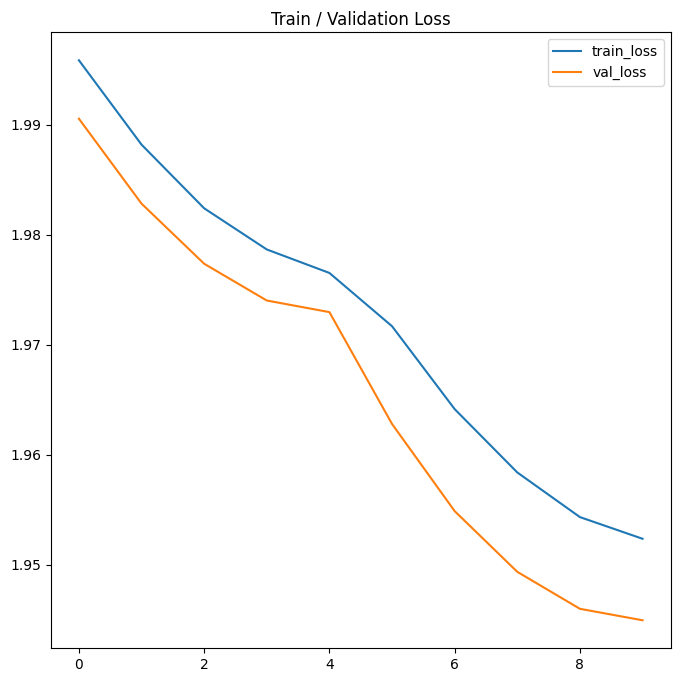

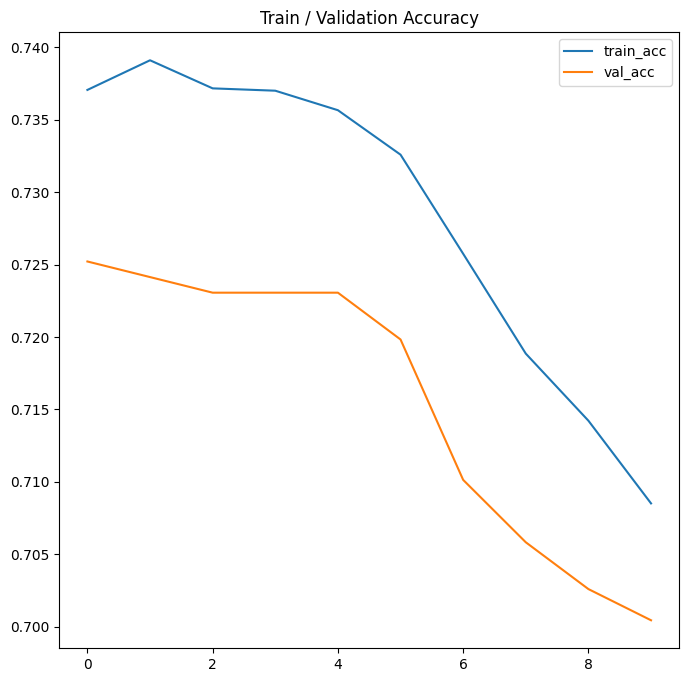

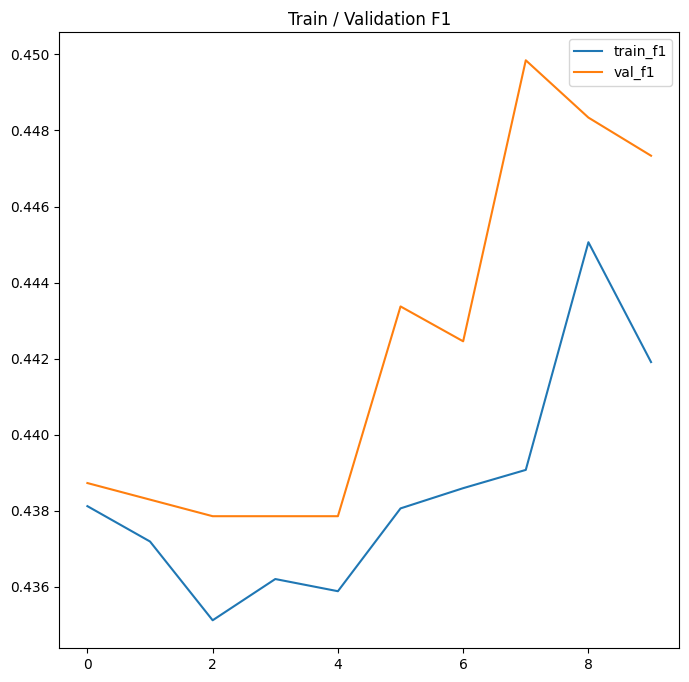

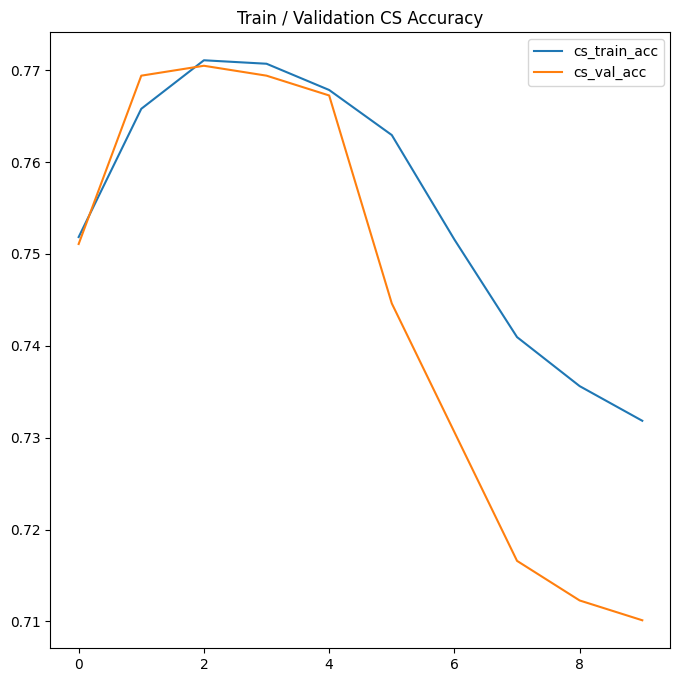

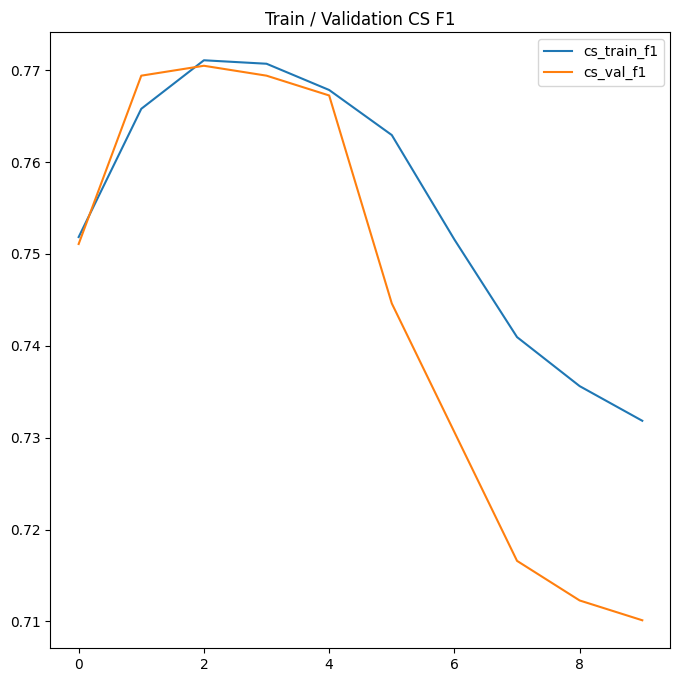

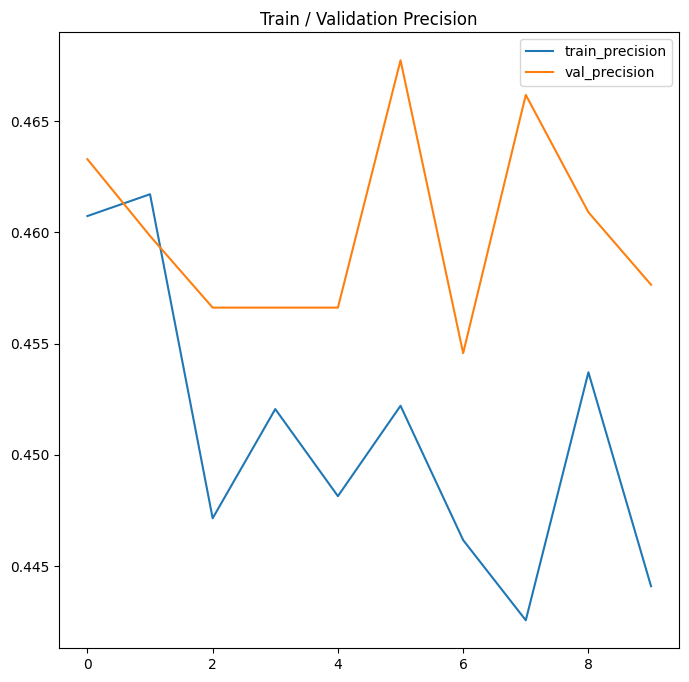

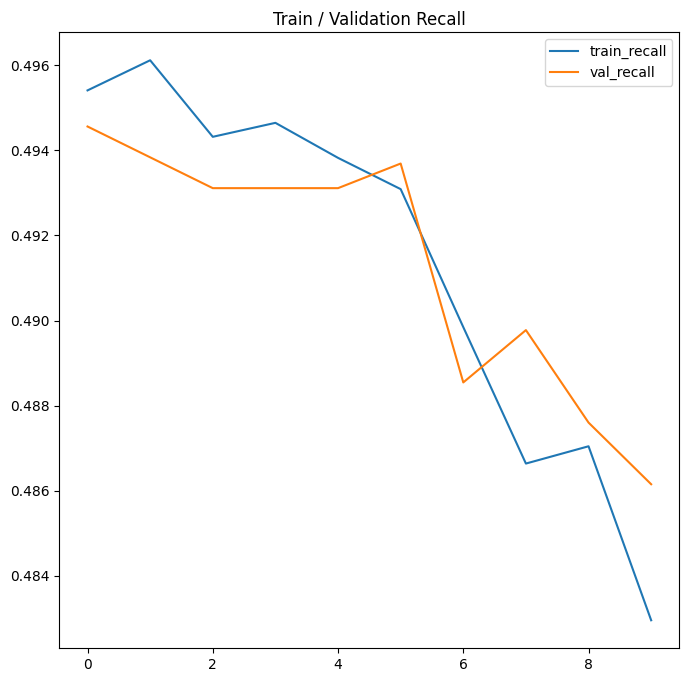

In [5]:
train_wrapper(device_id=3, train_base=False, train_space=True, experiment_name='inter-loss', n_latent=128, config={
    'l1': 1.0,
    'l2': 0.0,
    'ce_w': 0.0,
})()

In [ ]:
# multiprocessing.Process(target=train_wrapper(device_id=3, train_base=False, train_space=True, n_latent=128)).start()